### Lab 17: LSTM for Sentiment Analysis (IMDB Dataset)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 76s 236ms/step - accuracy: 0.7301 - loss: 0.5152 - val_accuracy: 0.8466 - val_loss: 0.3441
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 73s 233ms/step - accuracy: 0.9025 - loss: 0.2496 - val_accuracy: 0.8576 - val_loss: 0.3292
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 77s 245ms/step - accuracy: 0.9352 - loss: 0.1771 - val_accuracy: 0.8674 - val_loss: 0.3735
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 73s 233ms/step - accuracy: 0.9601 - loss: 0.1143 - val_accuracy: 0.8680 - val_loss: 0.4065
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 238ms/step - accuracy: 0.9617 - loss: 0.1068 - val_accuracy: 0.8570 - val_loss: 0.4000

Test Accuracy: 0.8575


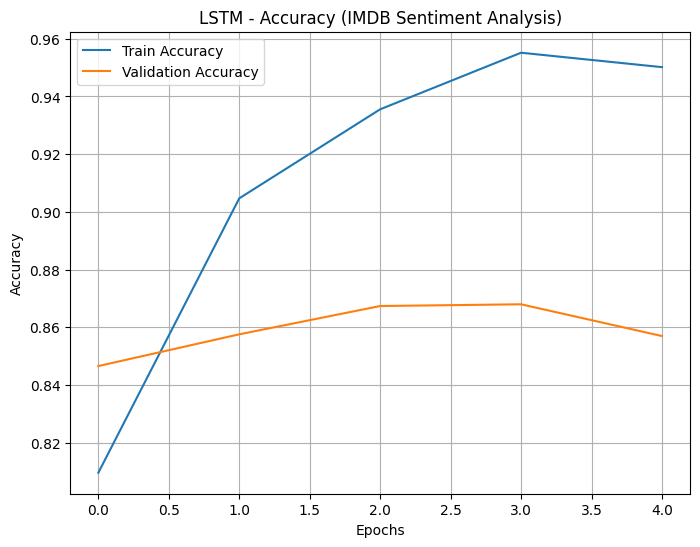

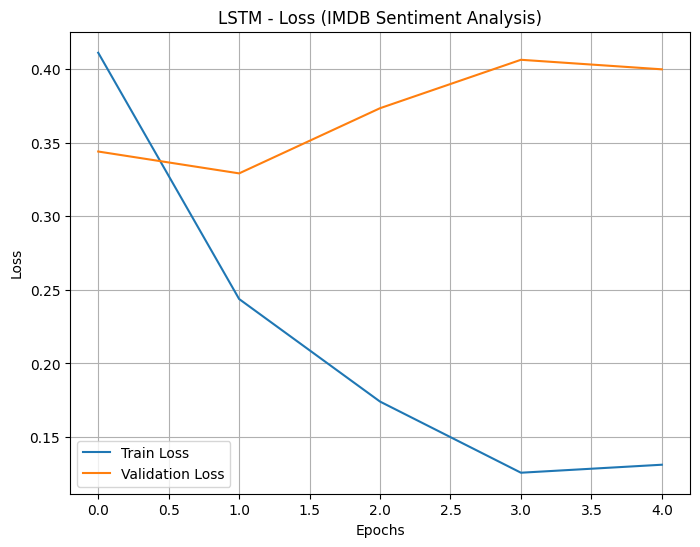

782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step


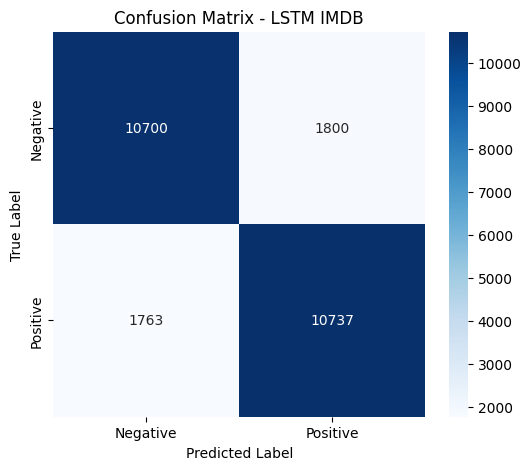


Classification Report - LSTM IMDB
              precision    recall  f1-score   support

    Negative       0.86      0.86      0.86     12500
    Positive       0.86      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. Load IMDB dataset
max_features = 10000   # Vocabulary size
max_len = 200          # Sequence length

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_features)

# Pad sequences to ensure equal length
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

# 2. Build LSTM Model
model = models.Sequential([
    layers.Embedding(input_dim=max_features, output_dim=128, input_length=max_len),
    layers.LSTM(64, return_sequences=False),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 3. Train Model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64,
    verbose=1
)

# 4. Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# 5. Plot Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("LSTM - Accuracy (IMDB Sentiment Analysis)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 6. Plot Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("LSTM - Loss (IMDB Sentiment Analysis)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# 7. Predictions
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()
y_true = y_test.flatten()

# 8. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix - LSTM IMDB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 9. Classification Report
print("\nClassification Report - LSTM IMDB")
print(classification_report(y_true, y_pred, target_names=['Negative', 'Positive']))
